### Lectura de datos

In [1]:
genexp<-read.csv("practica/GEMatrixFiltered.csv")
head(genexp)
dim(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
Cancer.BC0043T,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
Normal.BC0051N,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
Cancer.BC0051T,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
Normal.BC0057N,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
Cancer.BC0057T,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


[1]  86 482

Modificamos las etiquetas para que solo tengan la raiz (Normal o Cancer) y creamos otra etiqueta que indica lo mismo pero con valores numéricos. (También podria hacerse factorizando)

In [2]:
genexp$X <- substr(genexp$X,1,6)
genexp$X.n <- ifelse(genexp$X=="Cancer",1,0)
head(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at,X.n
Normal,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825,0
Cancer,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201,1
Normal,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721,0
Cancer,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667,1
Normal,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706,0
Cancer,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679,1


### Generamos con muestras aleatorias los conjuntos de training (70% del total) y test (30% del total)

In [3]:
set.seed(123)
idx<-sample(1:nrow(genexp),nrow(genexp)*0.7)
train.df<-genexp[idx,]
test.df<-genexp[-idx,]
print('Dimensiones train:')
    dim(train.df)
print('Dimensiones test:')
    dim(test.df)

[1] "Dimensiones train:"


[1]  60 483

[1] "Dimensiones test:"


[1]  26 483

## Normalizamos los datos

Veamos la distribución de las medias de los datos originales

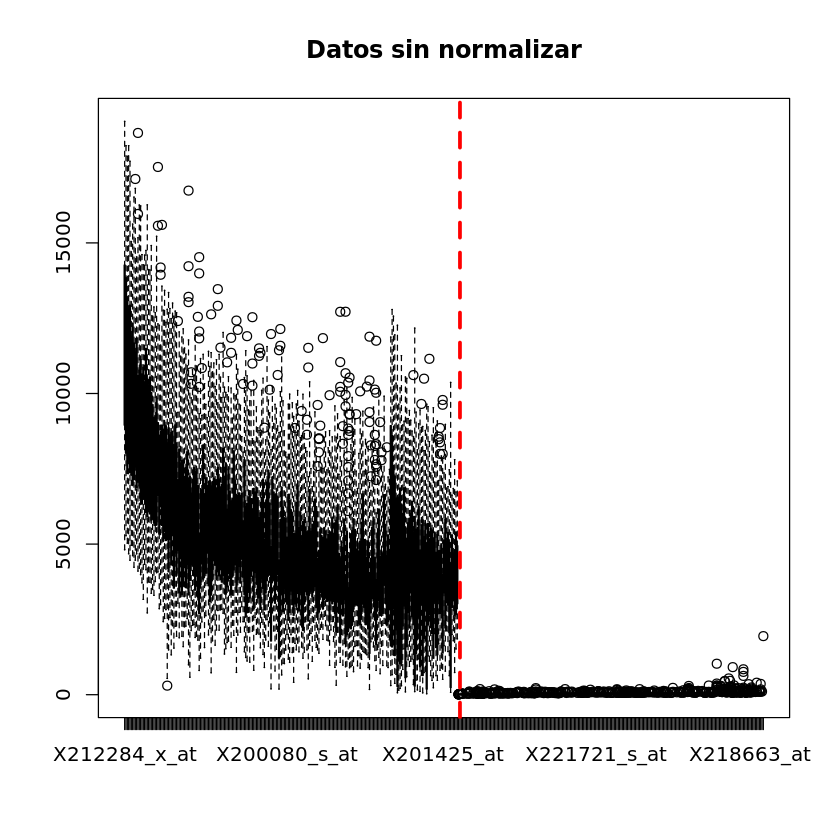

In [4]:
# Las columnas de las variables van desde la 2 a la n-1, ya que la primera y la última son las etiquetas ("Cancer","1")
columnas <- 2:(ncol(train.df)-1)

boxplot(train.df[columnas],main="Datos sin normalizar")
abline(v=253, col="red",lwd=3, lty=2)

Vemos que en el grupo de variables de la izquierda las medias se mueven entre 500 y 1000, mientras que en la parte de la derecha las variables parecen tener medias cercanas a 0. Vamos a normalizar para que todas estén en la misma escala.

In [5]:
library(pracma) 

mnCols<-repmat(colMeans(train.df[,columnas]),n = nrow(train.df),m=1)
sdCols<-repmat(sapply(train.df[,columnas], sd,na.rm=T),n = nrow(train.df),m=1)

train_norm<-(train.df[,columnas]-mnCols)/sdCols

# Para el test utilizamos la media y la varianza calculadas con el training
test_norm <-(test.df[,columnas]-mnCols[1:nrow(test.df),])/sdCols[1:nrow(test.df),]

# Añadimos las etiquetas correctas 
train_norm$X.n <- ifelse(train.df$X =="Cancer",1,0)
test_norm$X.n <- ifelse(test.df$X =="Cancer",1,0)
test_norm$X <- test.df$X

head(train_norm)
head(test_norm)

,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at,X.n
25,-1.26266860,-1.1162447,-1.1072020,-0.9686273,-0.9736260,-1.0466245,-1.0038540,-1.0024682,-0.63816860,-1.1560147,,-0.5993681,-0.69115377,-0.6908018,-0.3571903,-0.62803620,-1.1725364,0.2363637,-1.21708332,-0.13641301,0
68,-0.09843754,0.2655344,0.3833553,0.7112632,1.2590768,0.1781393,0.3599923,0.4078705,0.63740652,0.6877288,,-0.3548103,-0.12351715,1.5771699,0.6498230,0.52378117,-0.2923465,1.7628861,-0.71853737,-0.03590769,1
35,1.56469968,1.1922509,0.6784225,1.3383848,1.6449976,0.8216045,0.9648271,0.3973253,1.77070345,1.0402164,,1.6909773,-0.06318665,0.4278720,-0.2501654,0.03753169,0.2634964,-0.2321524,1.04363652,-0.11959909,0
74,0.99180370,1.0321706,1.5810580,1.1671698,0.9195480,1.2574168,1.4538113,1.8346815,-0.60916669,0.9205174,,-0.4740823,1.75456044,0.9744251,0.3731461,1.25879271,2.9593295,-0.1462314,0.63965612,-0.10064001,1
78,0.84458262,1.0163375,1.1589483,1.1250535,1.0936368,1.2365037,1.1969614,0.8927522,-0.22126248,1.0393467,,-0.8701733,2.60527804,0.5899520,6.7658398,1.88152376,1.1383388,-0.3952842,0.08924136,-0.13544704,1
4,-0.65910886,-0.5864925,-0.6305270,-0.3978786,-0.4244878,-0.2486686,-0.5707799,-0.8763619,0.03628979,-0.8137125,,-0.4446572,-0.71158384,-0.9266624,-0.2891214,-0.51748975,-0.5398799,-0.5512445,0.14982135,-0.16860750,1


,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at,X.n,X
1,-0.6340673,-1.0370152,-0.6119612,-0.7340691,-0.5056974,-0.6332882,-1.1212202,-1.1532846,-0.18946507,-1.1602551,,-0.42845137,-0.3770907,-0.5532980,-0.7055880,-0.4026449,-0.40513802,1.4478730,-0.1697595,0,Normal
12,-1.0102804,-0.9230695,-1.0029089,-0.7878643,-0.7575046,-0.9772530,-0.8967138,-1.0708369,-0.37638926,-0.7891187,,-0.15139548,-0.4791284,-0.5399836,-0.6505855,-0.5555527,-0.34220373,0.4566132,-0.1023940,1,Cancer
13,-0.9397567,-0.6349511,-0.7247921,-0.7068778,-0.4120297,-1.2299539,-0.8761718,-1.0655544,-0.06435157,-0.3921988,,-0.68944503,-0.8160721,-0.5314948,-0.7980470,-0.8703910,-0.07342316,-0.2673254,-0.1556388,0,Normal
14,-1.4276111,-1.3319829,-1.2633502,-1.2885806,-1.1032403,-1.6213056,-1.4295134,-1.4527093,-0.40919804,-0.9368657,,0.09614354,-0.9050229,-0.3708204,-1.1064517,-0.6759043,-0.55972088,-0.6262876,-0.1747519,1,Cancer
15,-1.4029925,-1.1339148,-1.2670872,-1.5636462,-1.4520729,-1.1186675,-1.2773454,-1.2309953,-0.46800313,-1.1550129,,-0.66295242,0.4823480,-0.4378984,-0.1626500,-0.6012297,-0.45988032,-1.1687195,-0.1624489,0,Normal
20,-0.6419301,-0.4290131,-0.7761352,-0.5309919,-0.4633120,-1.0721008,-0.8677312,-0.8220557,0.24582366,-0.7701846,,-0.38959960,-0.7607125,-0.5721189,-0.4142496,-0.7416585,-0.56552303,-0.7328246,-0.1467302,1,Cancer


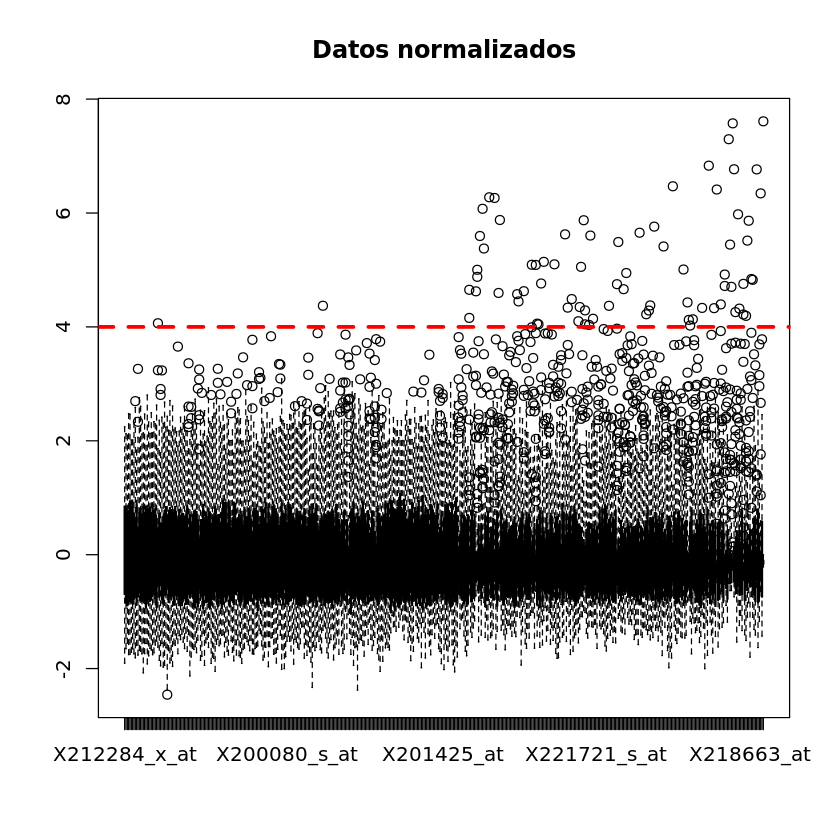

In [6]:
boxplot(train_norm[,1:(ncol(train_norm)-1)],main="Datos normalizados")
abline(h=4, col="red",lwd=3, lty=2)

Vemos como ahora todas las variables tienen media 0 y desviación estandar 1

### Estudio de outliers

Con tan pocas muestras no me atreveria a decir que existen outliers, por otro lado la variación máxima no llega a 8 con lo que no se si sería suficiente para definir estos puntos como outliers.

De todas formas hagamos el ejercicio de suponer que todo lo que está por encima de 4 son outliers y vamos a "eliminarlos"

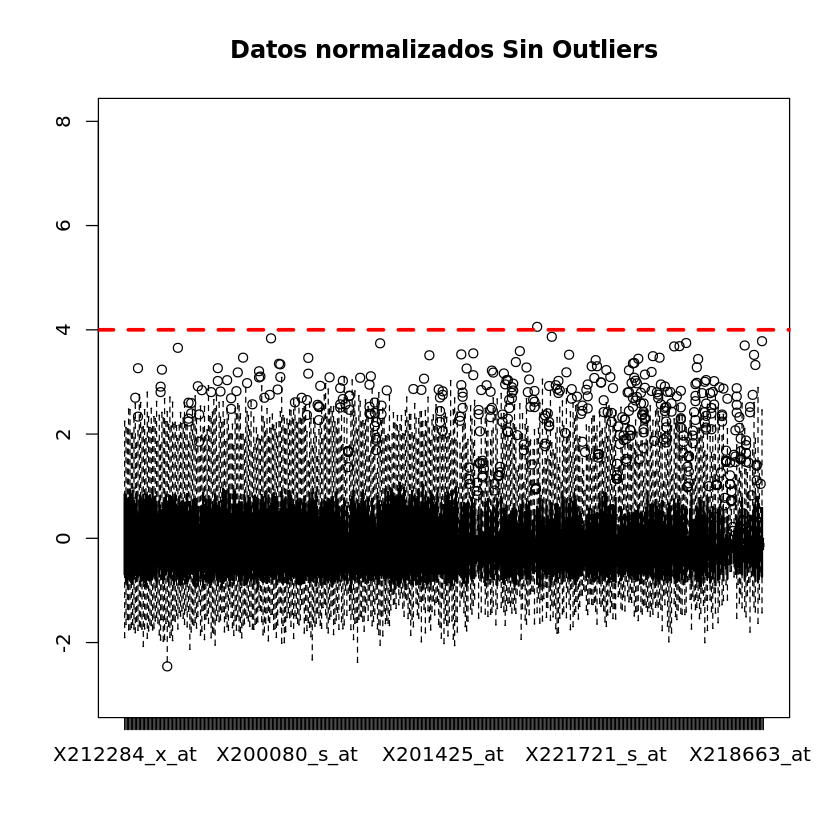

In [7]:

for (i in 1:(ncol(train_norm)-1)){
    x <- train_norm[,i]
    qnt  <- quantile(x, probs=c(.25, .75), na.rm = T)
    caps <- quantile(x, probs=c(.1, .90), na.rm = T)    
    H <- 2.5 * IQR(x, na.rm = T)
    x[x < (qnt[1] - H)] <- caps[1]
    x[x > (qnt[2] + H)] <- caps[2]
    train_norm[,i]<-x
}

boxplot(train_norm[,1:(ncol(train_norm)-1)], ylim = c(-3, 8),main="Datos normalizados Sin Outliers")
abline(h=4, col="red",lwd=3, lty=2)

# Parte 2
Realizar un modelo de regresión logistica que sea capaz de, dada la expresión genética de 482 genes realice una predicción de si el tejido es canceroso o no:
* Pintar curva ROC
* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión

### Creamos los modelos

In [8]:
# Modelo sin normalizar y con outliers
model1 <- glm(data=train.df[2:ncol(train.df)],formula=X.n ~. ,family = binomial(link='logit'))

# Modelo normalizado y sin outliers
model2 <- glm(data=train_norm,formula=X.n ~. ,family = binomial(link='logit'))

### Evaluamos los modelos

In [9]:
oldw <- getOption("warn")
options(warn = -1)

library(ggplot2)
evalua_modelo <- function(modelo,Y,data,humbral){

    y_predict <- predict(modelo,data)
    y_est <- factor(ifelse(y_predict < humbral ,0,1),labels=c("Cancer","Normal"))

    conf <- table(y_est,Y)
    precision <- conf[1,1]/(conf[1,2]+conf[1,1])
    exhaustividad <- conf[1,1]/(conf[2,1]+conf[1,1])
    exactitud <- (conf[1,1]+conf[2,2])/sum(sum(conf))
       
    p<-conf[1,1]/(conf[1,2]+conf[1,1])
    e<-conf[1,1]/(conf[2,1]+conf[1,1])
    b<-0.5
    
    f <- (1+b^2)*(p*e)/(b^2*p+e)
    
    out <- list("Confusion" = conf,
                "Precision" = precision,
                "Exhaustividad" = exhaustividad,
                "Exactitud" = exactitud,
                "F" = f,
                "Y_predict" = y_predict,
                "Y_est" = y_est
               )
    return(out)
}    

humbral = 0
eval1 <- evalua_modelo(model1,test.df$X,test.df,humbral)

eval2 <- evalua_modelo(model2,test_norm$X,test_norm,humbral)   
    
paste('~~~~~~~~~~~~~~~~~ Modelo original ~~~~~~~~~~~~~~~~~~~~~~~~~~')
paste('Distribucion de las predicciones')
summary(eval1$Y_predict)
paste('Matriz de confusion')
print(eval1$Confusion)
paste('Precision: ',eval1$Precision)
paste('Exhaustividad: ',eval1$Exhaustividad)
paste('Exhactitud: ',eval1$Exactitud)
paste('F-0.5: ',eval1$F)


paste('~~~~~~~~~~~~~ Modelo normalizado y sin outliers ~~~~~~~~~~~~~~')
paste('Distribucion de las predicciones')
summary(eval2$Y_predict)
paste('Matriz de confusion')
print(eval2$Confusion)
paste('Precision: ',eval2$Precision)
paste('Exhaustividad: ',eval2$Exhaustividad)
paste('Exhactitud: ',eval2$Exactitud)
paste('F-0.5: ',eval2$F)

options(warn = oldw)

[1] "~~~~~~~~~~~~~~~~~ Modelo original ~~~~~~~~~~~~~~~~~~~~~~~~~~"

[1] "Distribucion de las predicciones"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-141.1000  -40.1500   -0.7841    5.1110   54.3600  142.2000 

[1] "Matriz de confusion"

        Y
y_est    Cancer Normal
  Cancer      4      9
  Normal      8      5


[1] "Precision:  0.307692307692308"

[1] "Exhaustividad:  0.333333333333333"

[1] "Exhactitud:  0.346153846153846"

[1] "F-0.5:  0.3125"

[1] "~~~~~~~~~~~~~ Modelo normalizado y sin outliers ~~~~~~~~~~~~~~"

[1] "Distribucion de las predicciones"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-223.800  -75.220  -12.510    3.914   91.680  299.300 

[1] "Matriz de confusion"

        Y
y_est    Cancer Normal
  Cancer      6      9
  Normal      6      5


[1] "Precision:  0.4"

[1] "Exhaustividad:  0.5"

[1] "Exhactitud:  0.423076923076923"

[1] "F-0.5:  0.416666666666667"

El modelo normalizado y sin outliers mejora sensiblemente al modelo original. Tiene mayor exhactitud, acertamos 2 casos de cancer mas

### Pintamos la curva ROC

Warning message:
"Removed 7 rows containing missing values (geom_path)."

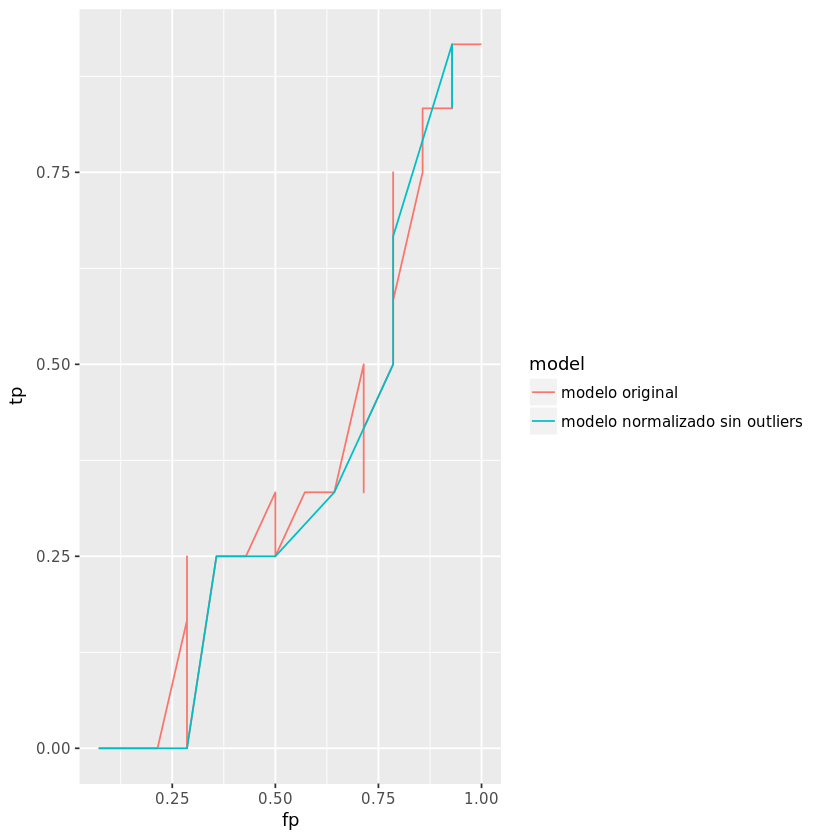

In [10]:
library(ggplot2)

calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_abedul<-y_real==1
    idx_abeto <-y_real==0

    M<-table(y_est,test.df$X)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

#y_predict<-predict(model,arboles.test)
dfROC<-data.frame(th=unique(eval1$Y_predict),tp=NA,fp=NA,model="modelo original")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(eval1$Y_predict,test.df$X.n,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}


dfROC2<-data.frame(th=unique(eval2$Y_predict),tp=NA,fp=NA,model="modelo normalizado sin outliers")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(eval1$Y_predict,test_norm$X.n,dfROC2$th[i])
    dfROC2$tp[i]<-v["tp"]
    dfROC2$fp[i]<-v["fp"]
}
dfROC<-rbind(dfROC,dfROC2)
dfROC<-dfROC[order(dfROC$fp),]

dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp,color=model))+geom_path()

En general vemos que los dos modelos son bastante malos

# Parte 2

Realizar clusterización por k-means y uno basado en árboles (dendrograma). ¿Cual sería el número de clusters óptimo?  ¿Puedes identificar algún cluster interesante?

## Clusters con Kmeans

 * ### Normalizamos los datos

[1]  86 481

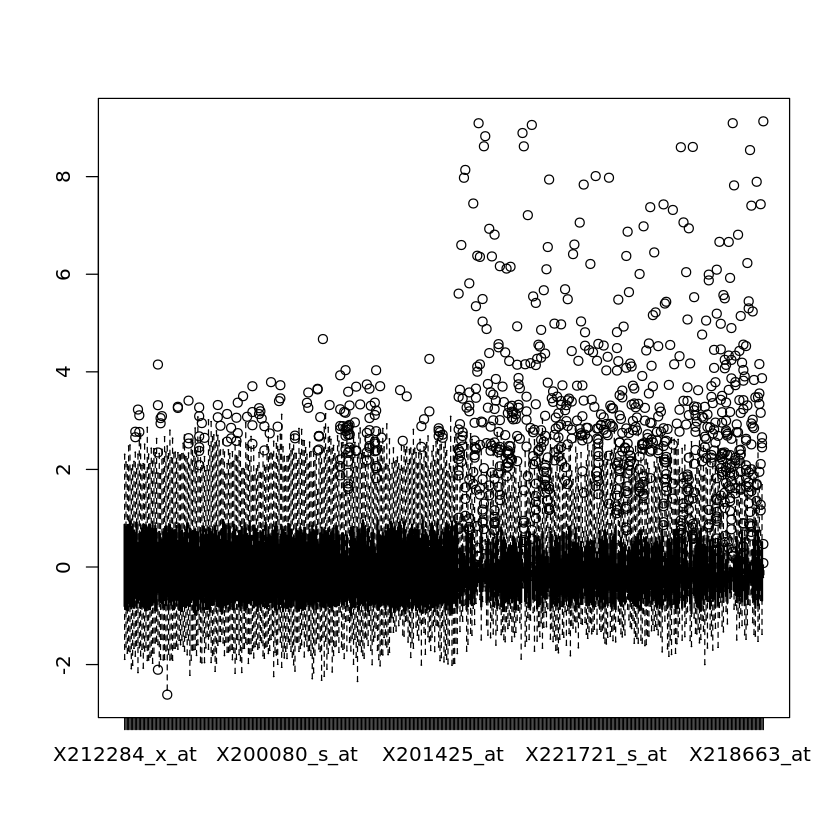

In [11]:
data <- genexp[,2:(ncol(genexp)-1)]

data_norm <- data
for (i in 1:ncol(data)){
    mn<- mean(data[,i],na.rm=T)
    sd<- sd(data[,i],na.rm=T)
    
    data_norm[,i]<-(data[,i]-mn)/sd
    
}
boxplot(data_norm)
dim(data_norm)

* ### Buscamos el número de clusters que nos parezcan óptimos

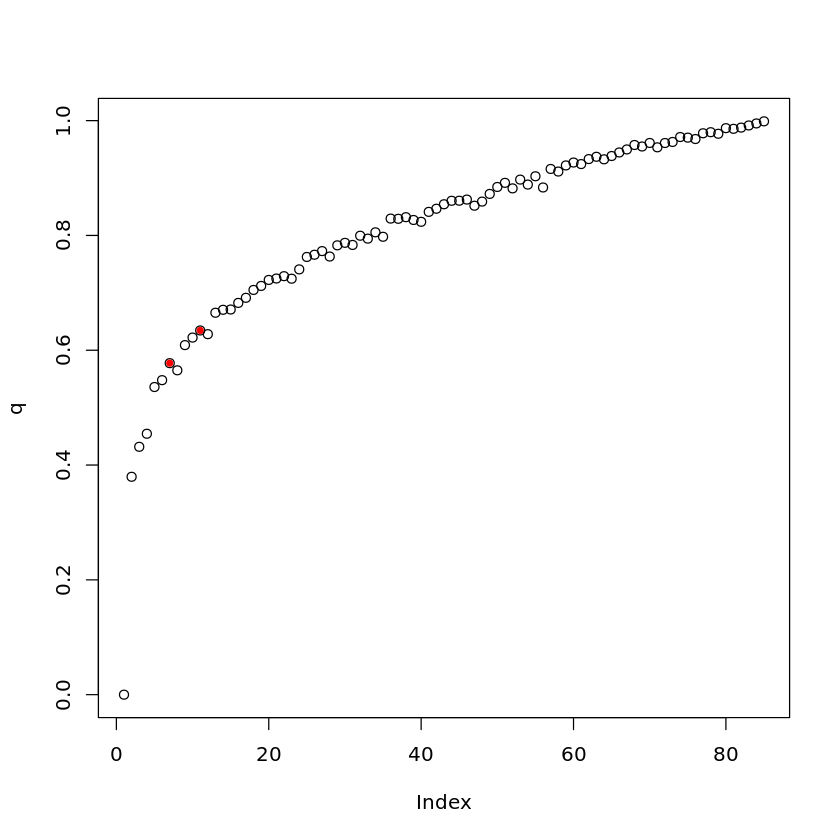

In [12]:
set.seed(1234)
q<-c()
# iteramos hasta tener un cluster por cada punto
for (k in 1:(nrow(data_norm)-1)){
    clusters<-kmeans(data_norm,k)
    q[k]<-clusters$betweenss/clusters$totss
}
plot(q)
# Podría estar bien la división entre 7 o 11 clusters
points(x=c(7,11),y= c(q[7],q[11]), col="red", pch=20)

Prueba con 11 clusters

In [13]:
set.seed(1234)
clusters<-kmeans(data_norm,11)
t <- table(genexp$X, clusters$cluster)
t
paste("Total muestras: ",sum(t))
paste("Muestras con cancer: ",sum(t[1,]))
paste("Muestras Normales  : ",sum(t[2,]))

        
          1  2  3  4  5  6  7  8  9 10 11
  Cancer  6  0  3  6  2  7 11  1  0  6  1
  Normal  5  4  0  0  3  0  0  6  1  8 16

[1] "Total muestras:  86"

[1] "Muestras con cancer:  43"

[1] "Muestras Normales  :  43"

En esta clusterización nos podrían interesar los clusters 3,4,6 y 7 ya que suman 27 elementos del grupo "cancer" un 62.8% de forma unívoca. No es tan bueno en el caso del grupo "normal", aun que los clusters 2 y 11 suponen un 46.5% de elementos "normales" pero con un "intruso"

Prueba con 7 clusters

In [14]:
set.seed(1234)
clusters<-kmeans(data_norm,(7))
t <- table(genexp$X, clusters$cluster)
t
paste("Total muestras: ",sum(t))
paste("Muestras con cancer: ",sum(t[1,]))
paste("Muestras Normales  : ",sum(t[2,]))

        
          1  2  3  4  5  6  7
  Cancer  6  1  6  0  3 15 12
  Normal 10 15  1  1  8  0  8

[1] "Total muestras:  86"

[1] "Muestras con cancer:  43"

[1] "Muestras Normales  :  43"

Podría estudiarse el cluster 6 ya que tiene bastantes elementos y todos son del mismo grupo "Cancer". Se podría añadir el cluster 3 con lo que tendríamos un 48.8% del grupo "Cancer" identificado aunque con un error.
También podría interesar el cluster 2 cuyos elementos son del grupo "normal" excepto uno

In [15]:
genexp[clusters$cluster == 6,]

,X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at,X.n
44,Cancer,14448.2,14340.7,13663.7,13035.2,13113.2,10251.20,11601.3,12107.1,10247.20,,22.6048,46.4542,35.4881,28.0022,31.1315,48.7924,69.3374,105.3400,35.2003,1
54,Cancer,17860.1,17006.5,17570.6,17725.0,16331.5,14353.30,15624.6,14190.0,12464.80,,50.7037,41.9848,41.8246,22.6365,37.8649,51.8030,34.3956,33.5468,44.3452,1
56,Cancer,11906.0,11958.7,13513.3,13064.5,13022.0,10532.20,11997.1,10956.5,11412.00,,16.5776,53.8348,54.2654,57.9729,29.5418,31.2747,26.2334,33.5252,43.9599,1
58,Cancer,13945.4,13565.5,14480.4,14280.7,12583.6,10795.20,12109.9,12040.9,9431.24,,21.6783,26.5518,52.9252,44.9455,55.5481,31.0616,23.9402,54.6794,29.7338,1
62,Cancer,15223.7,15266.5,16092.4,14123.6,14430.1,11683.00,13638.9,15145.8,8971.27,,23.8528,31.4044,33.6140,29.2401,43.4724,33.3907,50.9832,33.9756,44.4312,1
64,Cancer,14905.6,15191.1,12592.9,14091.5,12375.2,12293.50,12644.3,13332.8,11426.50,,31.8542,26.4896,48.5891,48.4545,52.3840,36.3047,22.9621,38.0068,34.1524,1
66,Cancer,10404.4,10461.3,11352.9,11596.6,11540.5,9600.64,10211.1,10800.2,9304.37,,31.4025,64.4702,54.3709,92.3865,66.4091,51.0980,32.2561,84.2231,42.5486,1
68,Cancer,11002.9,11847.4,11841.5,12571.0,13917.4,10080.30,10656.7,10732.2,11339.00,,31.8489,33.3441,60.9216,76.9214,41.6823,31.4090,131.3920,26.2422,58.6030,1
70,Cancer,11613.7,12312.0,13296.2,13027.6,12977.3,10558.20,11398.5,10627.6,7910.63,,27.3199,51.6083,65.6494,40.6211,58.8350,39.9157,176.1800,54.4058,33.2901,1
72,Cancer,14173.8,14221.8,14053.0,15376.0,15129.2,13034.60,13271.4,15303.7,8997.33,,27.8416,58.7198,50.6099,51.4498,55.7540,39.1699,34.4750,64.9594,38.5193,1


In [16]:
genexp[clusters$cluster == 2,]

,X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at,X.n
31,Normal,16079.5,16340.1,14212.2,13766.4,11995.60,12652.80,14234.1,14466.60,11449.90,,31.3888,37.8733,43.8108,31.5529,52.3444,51.1068,38.5152,38.5533,49.2564,0
33,Normal,16251.3,15808.2,12679.9,14594.2,13154.20,13079.10,12544.9,16520.70,15965.10,,43.5779,36.4870,31.6984,101.1250,49.6820,41.2005,33.2189,38.0625,34.1566,0
35,Normal,16703.3,15025.6,12879.0,14578.2,15131.10,11821.80,12472.5,10700.30,14521.40,,73.7588,34.6328,43.1028,29.6048,34.5878,42.8430,32.4679,57.2126,37.9568,0
37,Normal,15711.7,16498.0,13890.0,14795.8,14167.80,12951.30,13096.8,16314.90,14661.20,,43.9907,25.6267,43.4911,49.5673,24.3741,33.2400,90.8685,26.8531,48.4763,0
43,Normal,19036.0,17742.5,17156.0,18228.6,17710.70,13627.10,15084.5,16394.00,10047.80,,29.6279,21.0194,34.0242,19.2736,26.9693,37.8358,44.3723,31.4228,40.6691,0
45,Normal,12936.4,13206.5,12751.0,12051.2,11222.70,10300.40,11443.3,10469.80,9408.96,,21.4869,26.8170,27.2366,33.2442,35.1239,57.4804,37.1598,33.0480,26.1906,0
46,Cancer,12113.9,12494.3,12110.4,11015.3,10340.00,9941.20,10574.3,7993.07,11667.30,,26.7674,30.0093,33.0880,41.1619,36.4581,56.4360,31.4075,27.8594,38.1797,1
53,Normal,17061.4,18227.4,15760.7,14965.4,14677.10,14470.80,14630.9,12533.20,12713.90,,22.8854,27.5573,29.6921,26.5379,31.3839,66.8998,26.1428,46.7382,66.7818,0
55,Normal,14702.6,14994.8,15467.6,13824.2,13574.50,11972.80,13052.3,14230.80,9694.18,,30.7910,42.1218,59.6599,30.7942,47.2519,36.7090,38.9012,25.7489,33.5571,0
63,Normal,11589.3,13111.8,11680.1,10907.7,10114.00,10223.70,10913.3,11503.10,10137.80,,62.8503,34.9620,43.1373,38.4948,25.8944,35.7407,49.1009,55.8138,43.2993,0


## Clusters Jerárquicos

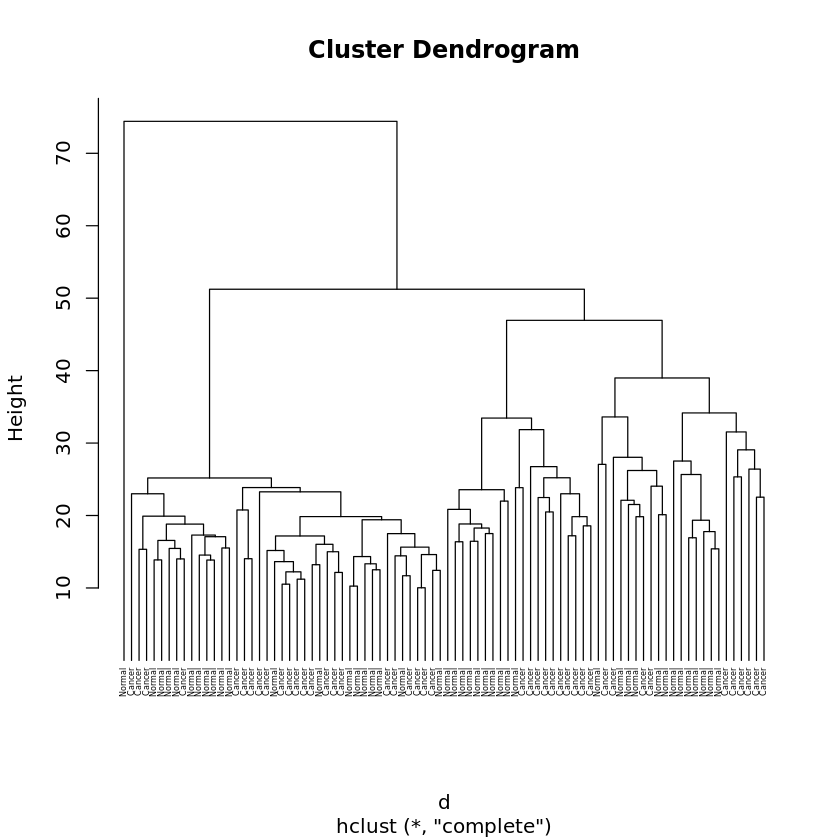

In [17]:
# Calculamos la matriz de las distancias entre cada par de muestras
d <- dist(as.matrix(data_norm),method = "euclidean")

# Creamos los clusters
hc <- hclust(d,method="complete")

# Pintamos el dendograma
plot(hc,hang = -1,cex=0.4,labels = genexp$X)

Podemos realizar un corte para obtener 11 clusters como en el caso del kmeans

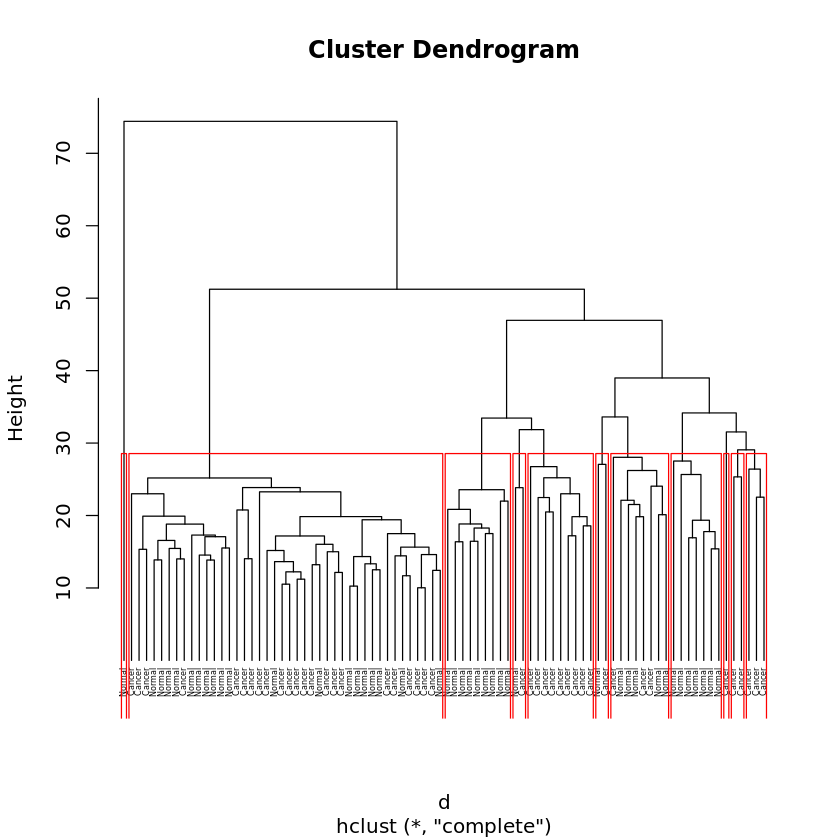

In [18]:
plot(hc,hang = -1,cex=0.4,labels = genexp$X)

# Visualización de los grupos formados por el cluster
rect.hclust(hc,k=11, border="red")

Cortando a una altura de 29 conseguimos los 11 clusters

In [19]:
table(genexp$X,cutree(hc,h=29))

        
          1  2  3  4  5  6  7  8  9 10 11
  Cancer 23  0  0  1  9  3  0  2  3  1  1
  Normal 19  1  9  1  0  5  7  0  0  1  0

Podrían interesarnos los clusters 3 y 7 para el grupo "Normal" y el cluster 5 para el grupo "Cancer"

Si cortamos a una altura de 33 obtenemos 8 clusters

In [20]:
table(genexp$X,cutree(hc,h=33))

        
          1  2  3  4  5  6  7  8
  Cancer 23  0  0 10  3  0  6  1
  Normal 19  1  9  1  5  7  0  1

En este caso nos podria interesar el 4 y el 7 para el grupo "Cancer" y el 3 y 6 para el grupo "Normal".

En ambos casos vemos que el cluster 1 está muy mezclado a estas distáncias

### Parte 3

Realizar un PCA, quedarse con los dos valores más representativos. Pintarlo en una nube de puntos donde los tejidos normales tendrán un color y los tejidos con cancer otro.

A partir de esta representación simplificada (con solo 2 valores más significativos) crear un modelo de regresión logística. Compara la curva ROC de este nuevo modelo con el de la *Parte 1*

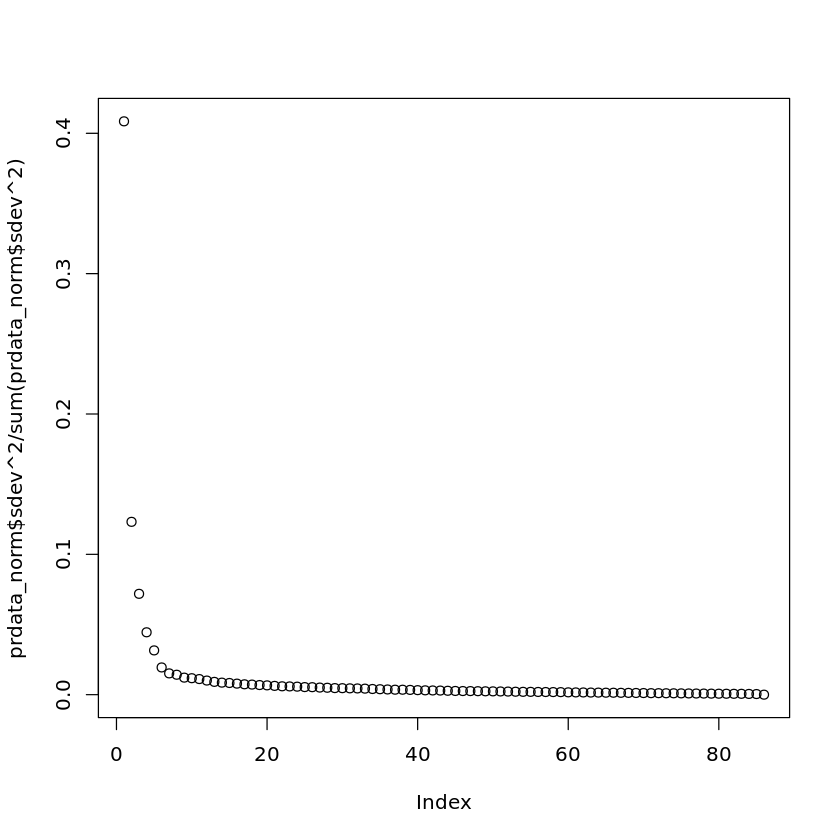

In [21]:
#Utilizamos prcomp para calcular el pca
prdata_norm<-prcomp(data_norm, center = FALSE , scale. = FALSE)
#Comprobamos que los dos primeros autovalores contienen algo mas del 50% de la varianza
plot(prdata_norm$sdev^2/sum(prdata_norm$sdev^2))

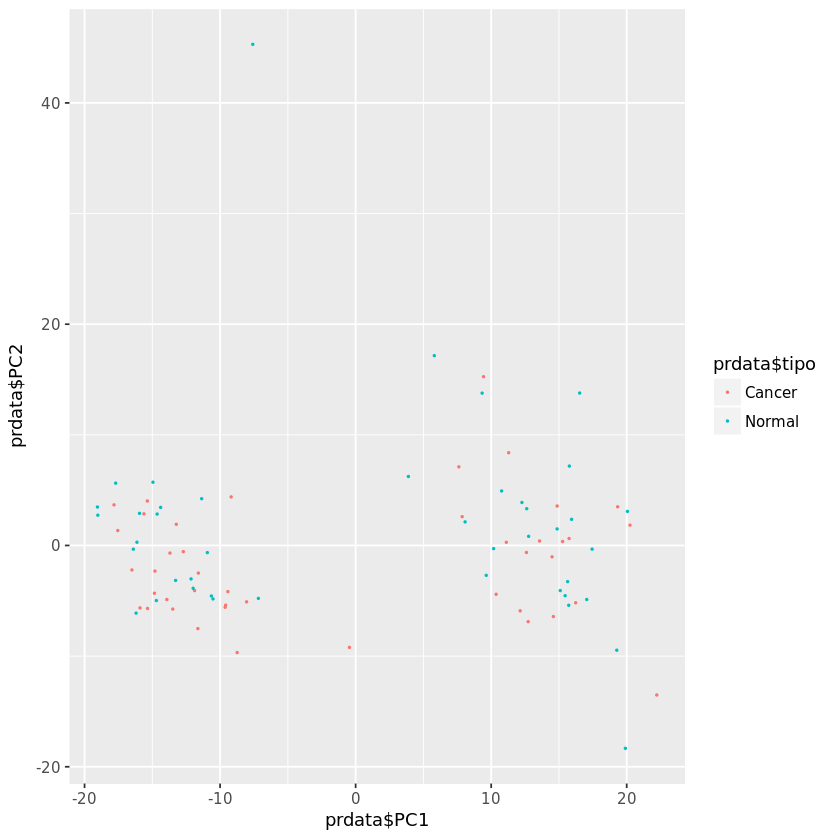

In [22]:
library(ggplot2)
prdata <- data.frame(prdata_norm$x[,c(1:2)])
prdata$tipo <- genexp$X

ggplot(prdata,aes(x=prdata$PC1,y=prdata$PC2,color=prdata$tipo))+geom_point(size=0.3)



Creamos los conjutos para train y test

In [23]:
set.seed(123)
idx<-sample(1:nrow(prdata),nrow(prdata)*0.7)
prtrain<-prdata[idx,]
prtest<-prdata[-idx,]
head(prtrain)
head(prtest)

,PC1,PC2,tipo
25,-16.40076,-0.3358935,Normal
68,12.60090,-0.6346280,Cancer
35,15.72160,-5.4073470,Normal
74,20.24356,1.8357599,Cancer
78,14.49128,-1.0267618,Cancer
4,-11.60026,-2.4953920,Cancer


,PC1,PC2,tipo
1,-15.943631,2.901287,Normal
12,-13.230685,1.914955,Cancer
13,-10.524212,-4.830122,Normal
14,-14.804955,-2.314854,Cancer
15,-14.952871,5.718202,Normal
20,-9.591469,-5.397675,Cancer


Creamos el modelo

In [24]:
prtrain$tipo <- as.factor(prtrain$tipo)
model3 <- glm(data=prtrain,formula=tipo ~PC1+PC2 ,family = binomial(link='logit'))

Pintamos la curva ROC

Warning message:
"Removed 1 rows containing missing values (geom_path)."

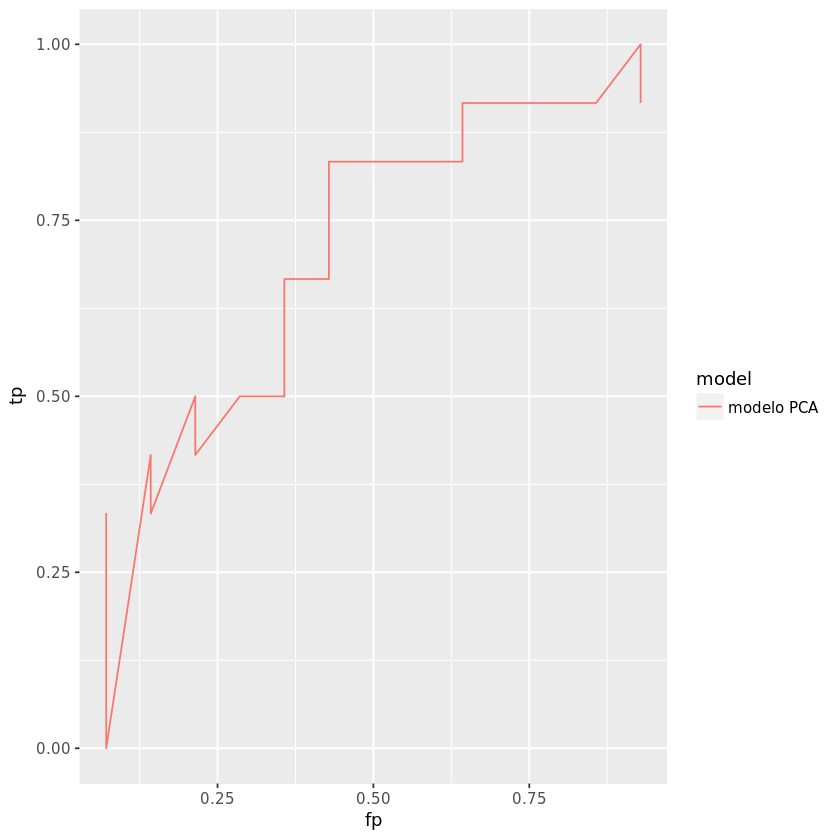

In [25]:
prtest$tipo <- as.factor(prtest$tipo)
y_predict<-predict(model3,prtest)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="modelo PCA")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,prtest$tipo,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}
dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp,color=model))+geom_path()

Vemos que la curva ROC del modelo PCA es mejor que las obtenidas anteriormente con los modelos con todas las dimensiones

In [26]:
eval3 <- evalua_modelo(model3,prtest$tipo,prtest,0)

paste('~~~~~~~~~~~~~ Modelo PCA normalizado y sin outliers ~~~~~~~~~~~~~~')
paste('Distribucion de las predicciones')
summary(eval3$Y_predict)
paste('Matriz de confusion')
print(eval3$Confusion)
paste('Precision: ',eval3$Precision)
paste('Exhaustividad: ',eval3$Exhaustividad)
paste('Exhactitud: ',eval3$Exactitud)
paste('F-0.5: ',eval3$F)

[1] "~~~~~~~~~~~~~ Modelo PCA normalizado y sin outliers ~~~~~~~~~~~~~~"

[1] "Distribucion de las predicciones"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.54430 -0.37810 -0.02012 -0.01116  0.11500  2.60300 

[1] "Matriz de confusion"

        Y
y_est    Cancer Normal
  Cancer      8      6
  Normal      4      8


[1] "Precision:  0.571428571428571"

[1] "Exhaustividad:  0.666666666666667"

[1] "Exhactitud:  0.615384615384615"

[1] "F-0.5:  0.588235294117647"